# ISLR: Chapter 2 Exercise 10

In [1]:
# perform imports & setup
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import load_boston # the boston data set is part of sklearn

% matplotlib inline
plt.style.use('ggplot') # emulate R style plotting

In [2]:
boston = load_boston() # load the boston data set

In [6]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

The boston data set is a dict lets start by getting all the keys of the dict to see what we have.

In [7]:
print(boston.keys())

dict_keys(['DESCR', 'target', 'data', 'feature_names'])


The description of the data set is under the 'DESCR' key. Lets start by looking at that...

In [10]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [14]:
boston['data'].shape

(506, 13)

In [15]:
boston['target'].shape

(506,)

## (a) 
This data set contains 506 instances. The instances are suburbs of Boston. This is a well-known data set that typically tries to predict attribute 14, called 'target' in the dict. The target is the median home value  in 1000's. There are thirteen features as described in detail above.

Lets form the data into a pandas dataframe to make it easier to work with.

In [16]:
# get the data array
data = boston['data']
# get the target array
targets = np.array([boston['target']])

# concatenate the data and targets into a single array for our data frame
allData = np.concatenate((data,np.transpose(targets)), axis=1) 

# set the column names making sure to append the median home value attribute
cols = np.append(boston['feature_names'], 'MEDV') 

bostonDF = pd.DataFrame(allData, columns=cols)

In [18]:
bostonDF.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


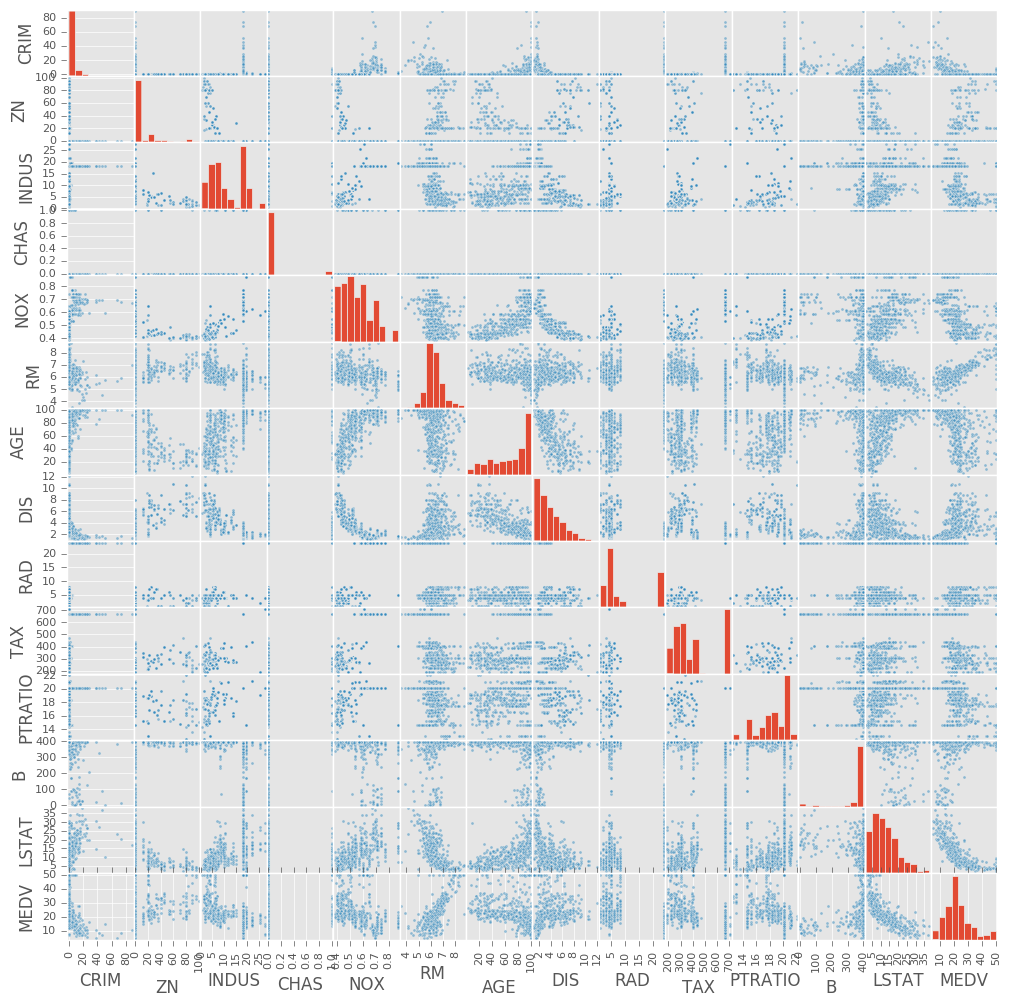

In [17]:
scatter_matrix(bostonDF, figsize=(12,12)); # make scatter plots

## (b-h)

This data set is incredibly interesting. Looking at the crime rate there are several predictors that have strong trends. 

(1) Mean crime rates are higher where land zones are below 25k sq ft.
(2) Mean crime rate is lower for tracts along the river
(3) Mean crime rate is higher where more pollutants are present
(4) Mean crime rate is higher for smaller homes (~6 rooms total)
(5) Mean crime rate is higher in suburbs with older homes
(6) Mean crime rates are higher in suburbs close to employment areas
(7) Mean crime rate is higher in suburbs near highways
(8) Mean crime rate is higher in suburbs with high pupil-teacher ratios
(9) Mean crime rate is higher in suburbs with low median home values.

Looking at the predictors in this data set, it looks like crime rates could be modeled by factors related to poverty; Lot size, rooms/home, home age, home value, pupil to teacher ratio etc..

In [19]:
np.nonzero(pd.np.array(bostonDF['CHAS']))[0].size # 35 suburbs bound the Charles River

35

In [20]:
bostonDF['PTRATIO'].median() # The median pupil-teacher ration is 19.05

19.05

In [21]:
bostonDF['MEDV'].min(), bostonDF['MEDV'].idxmin() # Suburb 398 has the lowest home value

(5.0, 398)

In [22]:
print(bostonDF.iloc[398])

CRIM        38.3518
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6930
RM           5.4530
AGE        100.0000
DIS          1.4896
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          396.9000
LSTAT       30.5900
MEDV         5.0000
Name: 398, dtype: float64


As expected these values are at the extreme ends of the ranges for their respective predictors. For example the number of homes zoned for 25k square ft is 0. The age of the homes are the oldest and the % lower status of the population is the highest. This suburb would be classified by these predictors as poor.

In [23]:
len(bostonDF[bostonDF['RM']>7]) # 64 suburbs have an average of > 7 rooms/dwelling

64

In [24]:
UpperClassDF = bostonDF[bostonDF['RM']>8]
len(UpperClassDF) # 13 suburbs have an average of > 8 rooms/dwelling

13

In [25]:
UpperClassDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


In these suburbs with larger homes (and most valuable; high TAX value), the average crime rate is below 1%. The areas are more residential (low 'INDUS') They are wealthier (low % LSTAT). They have lower pupil-to-teacher ratios. They have a cleaner living environs (lower NOX).